In [6]:
import pandas as pd
import numpy as np
import nltk
nltk.download('wordnet')


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\NISHANT\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [7]:
df=pd.read_csv('BA_final.csv')

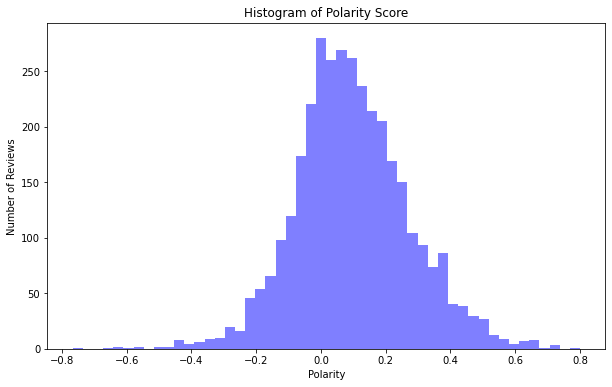

In [115]:
# Create quick lambda functions to find the polarity of each review
# Terminal / Anaconda Navigator: conda install -c conda-forge textblob
#using textblob to find polarity
from textblob import TextBlob
df['cleaned_data']= df['cleaned_data'].astype(str) #Make sure about the correct data type
pol = lambda x: TextBlob(x).sentiment.polarity
df['polarity'] = df['cleaned_data'].apply(pol) # depending on the size of your data, this step may take some time.
import matplotlib.pyplot as plt
import seaborn as sns
num_bins = 50
plt.figure(figsize=(10,6))
n, bins, patches = plt.hist(df.polarity, num_bins, facecolor='blue', alpha=0.5)
plt.xlabel('Polarity')
plt.ylabel('Number of Reviews')
plt.title('Histogram of Polarity Score')
plt.show();

In [122]:
#plt.figure(figsize=(10,10))
#sns.boxenplot( data=df)
#plt.xlabel('Good_reviews')
#plt.ylabel('polarity')
#plt.show();

df2=pd.DataFrame({'cleaned_data':df['cleaned_data'],'good_reviews':[]})



In [117]:
c=df['polarity'].tolist()
summ=0

for i in range(len(c)):
    if c[i]>0:
        summ=summ+1
print(summ)   


2457


In [120]:
#df['review']=np.nan
#categorising reviews based on polarity
for i in  range(len(df['polarity'])):
    if df['polarity'][i]>=0 and df['polarity'][i]<=0.33:
        df['review'][i]='good'
    elif df['polarity'][i]>=0.33 and df['polarity'][i]<=0.67:
        df['review'][i]='better'
    elif df['polarity'][i]>=0.67 and df['polarity'][i]<=1:
        df['review'][i]='best'
    elif df['polarity'][i]>=-1 and df['polarity'][i]<=-0.67:
        df['review'][i]='worst'
    elif df['polarity'][i]>=-0.67 and df['polarity'][i]<=-0.33:
        df['review'][i]='worse'
    elif df['polarity'][i]>=-0.33 and df['polarity'][i]<=0:
        df['review'][i]='bad'    
    

C:\Users\NISHANT\AppData\Local\Temp\ipykernel_22196\1704872524.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review'][i]='good'
C:\Users\NISHANT\AppData\Local\Temp\ipykernel_22196\1704872524.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review'][i]='bad'
C:\Users\NISHANT\AppData\Local\Temp\ipykernel_22196\1704872524.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review'][i]='better'
C:\Users\NISHANT\AppDat

In [121]:
print(df)

      Unnamed: 0.2  Unnamed: 0.1  Unnamed: 0  \
0                0             0           0   
1                1             1           1   
2                2             2           2   
3                3             3           3   
4                4             4           4   
...            ...           ...         ...   
3443          3443          3443        3443   
3444          3444          3444        3444   
3445          3445          3445        3445   
3446          3446          3446        3446   
3447          3447          3447        3447   

                                                reviews  \
0     ✅ Trip Verified | I must admit like many other...   
1     Not Verified |  When will BA update their Busi...   
2     ✅ Trip Verified |  Paid £200 day before flight...   
3     ✅ Trip Verified |  BA website did not work (we...   
4     ✅ Trip Verified |  Absolutely terrible experie...   
...                                                 ...   
3443  HKG-

In [169]:
#counting the  each categories
def summ(data):
    d=['good','better','best','bad','worse','worst']
    good=0
    better=0
    best=0
    bad=0
    worse=0
    worst=0
    c=data
    for i in range(len(c)):
        if c[i]=='good':
            good=good+1
        elif c[i]=='better':
            better=better+1
        elif c[i]=='best':
            best=best+1
        elif c[i]=='bad':
            bad=bad+1 
        elif c[i]=='worse':
            worse=worse+1
        elif c[i]=='worst':
            worst=worst+1    
            
            
    return(d,listt=[good,better,best,bad,worse,worst])            

In [173]:
d,listt=summ(df.review.tolist())
print(d)
print(listt)

['good', 'better', 'best', 'bad', 'worse', 'worst']
[2130, 335, 6, 940, 36, 1]


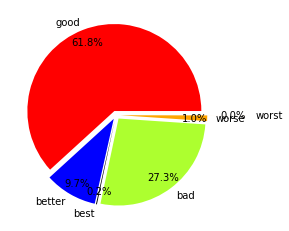

In [177]:
# colors
colors = ['#FF0000', '#0000FF', '#000000', 
          '#ADFF2F', '#FFA500','#FFEBCD']

# explosion
explode = (0.05, 0.05, 0.05, 0.05, 0.05,0.5)
plt.pie(listt, colors=colors, labels=d,
        autopct='%1.1f%%', pctdistance=0.85,
        explode=explode)
plt.show()

In [181]:

304832422028346214034228144326872068784543438208837014565318760077136413688647660217016574085041463 %6875432550802788522450086205424482216882

4910431768737195545839591417582333683515

In [187]:
for i in range(1, 101):
    output = ""
    if i % 3 == 0:
        output += "Fizz"
    if i % 5 == 0:
        output += "Buzz"
    if not output:
        output = i
    print(f"{i}: {output}")
    if output == "FizzBuzz":
        break
print("Most cursed code")


1: 1
2: 2
3: Fizz
4: 4
5: Buzz
6: Fizz
7: 7
8: 8
9: Fizz
10: Buzz
11: 11
12: Fizz
13: 13
14: 14
15: FizzBuzz
Most cursed code
